# Amazon Reviews Analysis

<div style="font-size:20px;">In today’s digital marketplace, user reviews are invaluable for both consumers and businesses. They provide insights into product performance and customer satisfaction, guiding purchasing decisions and shaping product improvements. With the proliferation of e-commerce platforms, analyzing vast quantities of review data has become essential for extracting meaningful information. This project delves into Natural Language Processing (NLP) techniques to analyze and classify reviews of electronic products sold on Amazon.com.

We process a dataset containing 1,689,188 reviews to uncover patterns and sentiments expressed by users. But we will use only 50,000 reviews for this project, because we have limited resources like RAM and disk space or time. Our approach involves several key NLP steps:
<ol>
    <li><b>Data Preprocessing:</b> Converting text to lowercase, removing punctuation, HTML tags, and stopwords to clean the data.</li>
<li><b>Sentiment Analysis:</b> Creating word clouds to visualize frequent terms in positive and negative reviews.</li>
    <li><b>Named Entity Recognition (NER):</b> Identifying specific entities mentioned in the reviews to understand context and focus areas.</li>
<li><b>Rating Prediction:</b> Utilizing classification algorithms to predict the rating of new reviews based on the text.</li>
</ol>
Each phase of this project is meticulously analyzed, with reflections on the methodologies employed and the insights gained. We also strive to optimize our code for efficiency, ensuring robust and scalable solutions for real-world applications.

This introduction sets the stage for your detailed exploration of NLP techniques applied to Amazon product reviews, emphasizing the importance of each step and the ultimate goal of the project.</div>

In [1]:
import os
import pandas as pd

dataset = "Electronics_5.json"

if os.path.isfile(dataset):
    df = pd.read_json("Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)

display(df.head(10))

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"
5,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",I am using this with a Nook HD+. It works as d...,5,HDMI Nook adapter cable,1388707200,"01 3, 2014"
6,A2P5U7BDKKT7FW,0594451647,Christian,"[0, 0]",The cable is very wobbly and sometimes disconn...,2,Cheap proprietary scam,1398556800,"04 27, 2014"
7,AAZ084UMH8VZ2,0594451647,"D. L. Brown ""A Knower Of Good Things""","[0, 0]",This adaptor is real easy to setup and use rig...,5,A Perfdect Nook HD+ hook up,1399161600,"05 4, 2014"
8,AEZ3CR6BKIROJ,0594451647,Mark Dietter,"[0, 0]",This adapter easily connects my Nook HD 7&#34;...,4,A nice easy to use accessory.,1405036800,"07 11, 2014"
9,A3BY5KCNQZXV5U,0594451647,Matenai,"[3, 3]",This product really works great but I found th...,5,This works great but read the details...,1390176000,"01 20, 2014"


In [2]:
df.shape

(1689188, 9)

In [3]:
df=df.sample(50000)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 1629919 to 333932
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      50000 non-null  object
 1   asin            50000 non-null  object
 2   reviewerName    49329 non-null  object
 3   helpful         50000 non-null  object
 4   reviewText      50000 non-null  object
 5   overall         50000 non-null  int64 
 6   summary         50000 non-null  object
 7   unixReviewTime  50000 non-null  int64 
 8   reviewTime      50000 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.8+ MB


In [5]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
1629919,A28NXR4PQQMBBW,B00DY2Y28M,JJ,"[59, 66]",Initial impression: It's hard to believe what ...,5,"I Expected a Lot, but.......",1378339200,"09 5, 2013"
215725,A2INUQMZX1BJ37,B000FVTPX2,"D. Shields ""Dano 440""","[1, 1]",I had bought a 37 element TV antenna about 5 y...,5,small but powerful,1211414400,"05 22, 2008"
570680,A3BHH0ID9TNFEX,B00280BDM4,J. Rader,"[0, 0]",Has worked perfectly for several months. I lo...,5,Works great!,1275955200,"06 8, 2010"
1240798,A3NJIIDIXLQFIN,B006QB1RPY,Siffert,"[0, 0]",Was not happy with the Asus N56U router with p...,5,Great!,1397865600,"04 19, 2014"
1235350,A2I04FQLP4257S,B006MJZOMW,Ross Bernheim,"[0, 0]",I use it with my Samsung Galaxy III. It does w...,5,Adds a lot of functionality,1372723200,"07 2, 2013"


In [6]:
df.to_csv("amazon_dataset.csv")

# EDA - Exploratory Data Analysis

<p style="font-size: 20px">Exploratory Data Analysis (EDA) is a crucial phase in data analysis that involves summarizing and visualizing the main characteristics of a dataset, often with the help of statistical graphics and data visualization techniques. The primary objective of EDA is to understand the underlying structure, detect anomalies, test underlying assumptions, and check for patterns or relationships that may guide further analysis or inform decision-making.</p>

In [7]:
df=df.reset_index()

In [8]:
df["reviewText"][0]

"Initial impression: It's hard to believe what this camera's capabilities are until you've used one.  I have bags full of camera equipment including a Mamiya RB-67, Pentax 6x7, Canon 5D Mk2, Canon T2i and a lot of glass so trust me when I say, this camera lives up to the pre-release hype.  I originally had my sights set on the Canon SX50 which is a good camera, but falls short of its Lumix peer.  My focus was to get an easy to use point-and-shoot camera for my wife since the SLRs were just too much for her to handle - but now she's going to have to fight me for it.  I will update this review as I gain more experience with the video and special functions (which there are many) in the future.  Until then, I recommend you get one while the price remains well below $400 because I don't think it will stay their long when the word gets out how great this camera performs.UPDATE: After using this camera for nearly 6-months, I am still VERY happy with it and the pictures it produces - and would

# Preprocessing

In [9]:
#Making data lower
df["reviewText"]=df["reviewText"].str.lower()

In [10]:
#Removing punctuations
df["reviewText"]=df["reviewText"].str.replace('[^\w\s]','',regex=True)

In [11]:
#Removing \n
df["reviewText"]=df["reviewText"].str.replace('\n','')

In [12]:
#Removing numbers
df["reviewText"]=df["reviewText"].str.replace('\d+','',regex=True)

# Detecting Languages

<p style="font-size: 20px">Since many machine learning libraries and natural language processing tools primarily support English and may not effectively handle non-English alphabets or multilingual data, it is crucial to filter the dataset to focus on English comments only. To achieve this, we will employ language detection techniques to identify the language of each comment within our dataset. Once identified, we will selectively retain only those comments written in English. This step ensures that subsequent NLP processing and model training are streamlined and that the tools we use can operate at their full potential without encountering issues related to multilingual text processing or character encoding inconsistencies. By focusing on English comments, we can improve the accuracy and efficiency of our analysis, ensuring robust results and facilitating the use of a wide range of established libraries and methodologies in our machine learning workflow.</p>

In [13]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=0e1794f5dde5d2fc7c0420229cd43f0f78532bcbc0b734dd0245f20cdf68110d
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [14]:
#Detecting language function
from langdetect import detect
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"

df['language'] = df['reviewText'].apply(detect_language)


In [15]:
#Removing html tags
import re
import html
def remove_html_tags(text):
    clean = re.sub(r'<.*?>', '', text)
    return clean
df["reviewText"] = df["reviewText"].apply(remove_html_tags)
df["reviewText"] = df["reviewText"].apply(html.unescape)

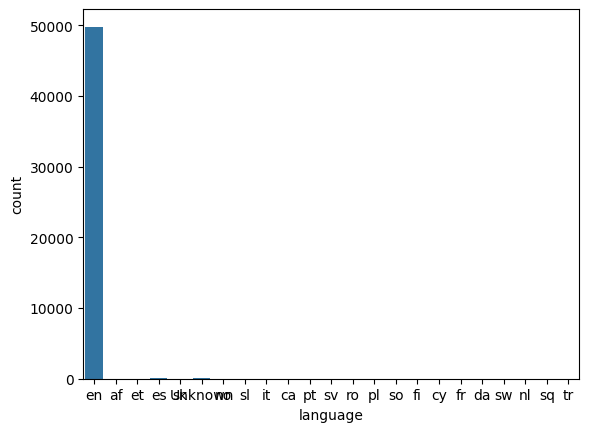

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='language', data=df)
plt.show()

In [17]:
df.language.value_counts()

language
en         49814
es            65
Unknown       36
af            22
ca            13
no             6
pt             5
so             5
da             5
sv             4
sl             4
fi             3
it             3
ro             3
et             2
fr             2
pl             2
sk             1
cy             1
sw             1
nl             1
sq             1
tr             1
Name: count, dtype: int64

<p style="font-size:20px;">As you can see above, there are 49814 English reviews in the dataset. We will remove all the reviews that are not in English. Moreover, since these are very few, they will not have a negative impact on training.</p>

In [18]:
#Removing non-english reviews
df=df[df["language"]=="en"]
df=df.reset_index()

# NER - Named Entity Recognition

<p style="font-size: 20px">Named Entity Recognition (NER) is a key technique in Natural Language Processing (NLP) that focuses on identifying and classifying entities within text into predefined categories such as names of people, organizations, locations, dates, and quantities. NER enables machines to comprehend text data by recognizing entities that are crucial for understanding the context and meaning. For instance, in a sentence like “Amazon is headquartered in Seattle,” NER would identify “Amazon” as an organization and “Seattle” as a location. This capability is fundamental for various applications, including information extraction, question answering, and summarization. By transforming unstructured text into structured data, NER enhances the ability to analyze large datasets and extract meaningful insights, thereby improving the efficiency of data-driven decision-making processes. Advanced NER systems utilize machine learning models, such as Conditional Random Fields (CRF) and Transformer-based architectures, to achieve high accuracy in recognizing entities across different languages and domains.</p>

In [19]:
!pip install -U spacy

In [20]:
!spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [21]:
import spacy
from spacy import displacy
NER=spacy.load("en_core_web_sm")

In [22]:
df.head()

,level_0,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,language
0,0,1629919,A28NXR4PQQMBBW,B00DY2Y28M,JJ,"[59, 66]",initial impression its hard to believe what th...,5,"I Expected a Lot, but.......",1378339200,"09 5, 2013",en
1,1,215725,A2INUQMZX1BJ37,B000FVTPX2,"D. Shields ""Dano 440""","[1, 1]",i had bought a element tv antenna about year...,5,small but powerful,1211414400,"05 22, 2008",en
2,2,570680,A3BHH0ID9TNFEX,B00280BDM4,J. Rader,"[0, 0]",has worked perfectly for several months i lov...,5,Works great!,1275955200,"06 8, 2010",en
3,3,1240798,A3NJIIDIXLQFIN,B006QB1RPY,Siffert,"[0, 0]",was not happy with the asus nu router with poo...,5,Great!,1397865600,"04 19, 2014",en
4,4,1235350,A2I04FQLP4257S,B006MJZOMW,Ross Bernheim,"[0, 0]",i use it with my samsung galaxy iii it does wh...,5,Adds a lot of functionality,1372723200,"07 2, 2013",en


In [23]:
df.to_csv("amazon_dataset.csv")

In [24]:
import pandas as pd
df=pd.read_csv("amazon_dataset.csv")

In [25]:
df["overall"].fillna("", inplace=True)

In [26]:
df["reviewText"].fillna("", inplace=True)

In [27]:
person = []
org = []
gpe = []
loc = []
product = []
event = []
work_of_art = []
law = []

for index, row in df.iterrows():
    text = row["reviewText"]
    doc = NER(text)

    persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
    orgs = [ent.text for ent in doc.ents if ent.label_ == 'ORG']
    gpes = [ent.text for ent in doc.ents if ent.label_ == 'GPE']
    locs = [ent.text for ent in doc.ents if ent.label_ == 'LOC']
    products = [ent.text for ent in doc.ents if ent.label_ == 'PRODUCT']
    events = [ent.text for ent in doc.ents if ent.label_ == 'EVENT']
    works_of_art = [ent.text for ent in doc.ents if ent.label_ == 'WORK_OF_ART']
    laws = [ent.text for ent in doc.ents if ent.label_ == 'LAW']

    person.append(persons)
    org.append(orgs)
    gpe.append(gpes)
    loc.append(locs)
    product.append(products)
    event.append(events)
    work_of_art.append(works_of_art)
    law.append(laws)

df["PERSON"] = person
df["ORG"] = org
df["GPE"] = gpe
df["LOC"] = loc
df["PRODUCT"] = product
df["EVENT"] = event
df["WORK_OF_ART"] = work_of_art
df["LAW"] = law

The provided code snippet demonstrates how to perform Named Entity Recognition (NER) on a dataset of text reviews, extracting specific entity types and adding them as new columns in the DataFrame.

### Code Explanation

1. **Initialization**:
   - **Entity Lists**: Lists such as `person`, `org`, `gpe`, etc., are initialized to store detected entities from the reviews for each entity type.

2. **Iterating Over DataFrame Rows**:
   - The code iterates through each row of the DataFrame `df`, extracting the text from the `reviewText` column.
   - `NER(text)` is applied to the text to perform named entity recognition, generating a `doc` object that contains the recognized entities.

3. **Extracting Entities**:
   - Entities are extracted by filtering `doc.ents` based on their labels (e.g., `'PERSON'`, `'ORG'`, `'GPE'`).
   - Lists `persons`, `orgs`, `gpes`, etc., are populated with the text of entities matching their respective labels.

4. **Appending to Entity Lists**:
   - Each list (`person`, `org`, `gpe`, etc.) is appended with the corresponding list of detected entities for that row.

5. **Adding Entity Columns**:
   - New columns are added to the DataFrame `df` for each entity type, with the lists of entities as their values.

In [28]:
df.head()

,Unnamed: 0,level_0,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,...,reviewTime,language,PERSON,ORG,GPE,LOC,PRODUCT,EVENT,WORK_OF_ART,LAW
0,0,0,1629919,A28NXR4PQQMBBW,B00DY2Y28M,JJ,"[59, 66]",initial impression its hard to believe what th...,5,"I Expected a Lot, but.......",...,"09 5, 2013",en,"[mm, mm]",[],[],[],[],[],[],[]
1,1,1,215725,A2INUQMZX1BJ37,B000FVTPX2,"D. Shields ""Dano 440""","[1, 1]",i had bought a element tv antenna about year...,5,small but powerful,...,"05 22, 2008",en,[],[],[],[],[],[],[],[]
2,2,2,570680,A3BHH0ID9TNFEX,B00280BDM4,J. Rader,"[0, 0]",has worked perfectly for several months i lov...,5,Works great!,...,"06 8, 2010",en,[],[],[],[],[],[],[],[]
3,3,3,1240798,A3NJIIDIXLQFIN,B006QB1RPY,Siffert,"[0, 0]",was not happy with the asus nu router with poo...,5,Great!,...,"04 19, 2014",en,"[att gb, mac]",[],[],[],[],[],[],[]
4,4,4,1235350,A2I04FQLP4257S,B006MJZOMW,Ross Bernheim,"[0, 0]",i use it with my samsung galaxy iii it does wh...,5,Adds a lot of functionality,...,"07 2, 2013",en,[],"[samsung, usb]",[],[],[],[],[],[]


# Sentiment Analysis

## Creating WordCloud

<p style="font-size: 20px;">Creating word clouds can significantly enhance comprehension and insights in text analysis by visually representing the most frequent words in a dataset. By showcasing words based on their prominence, word clouds allow for quick identification of key themes and concepts within the text. This visualization technique helps to highlight the most discussed topics, recurring phrases, or common sentiments, making it easier for analysts to grasp the overarching trends without delving into detailed and lengthy text data. Furthermore, word clouds serve as an intuitive tool for spotting patterns or anomalies that may warrant further investigation, thereby streamlining the initial exploratory phase of data analysis. They provide a compelling visual summary that can assist in presenting findings to non-technical stakeholders, making the data more accessible and engaging. Overall, the use of word clouds facilitates a more effective and efficient understanding of large volumes of text, aiding in the extraction of actionable insights.</p>

In [31]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 3.2 MB/s eta 0:00:00


In [32]:
#Importing necessary libraries
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [33]:
#Creating a function to generate wordcloud
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('cloud.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

### Polarity and Subjectivity

<p style="font-size: 20px;">Polarity and subjectivity are fundamental metrics in sentiment analysis, providing insights into the sentiment and tone of textual data. Polarity measures the sentiment expressed in a text, ranging from negative to positive, with values typically between -1 (most negative) and 1 (most positive). This metric helps to identify the overall emotional attitude conveyed by the text, such as whether a review is expressing satisfaction or dissatisfaction. On the other hand, subjectivity assesses the degree to which the text is opinion-based rather than fact-based, with values ranging from 0 (completely objective) to 1 (completely subjective). Higher subjectivity indicates that the text contains personal opinions, emotions, or judgments, while lower subjectivity suggests factual and neutral content. Analyzing polarity and subjectivity together provides a comprehensive understanding of the text’s sentiment and helps distinguish between different types of narratives. For instance, in customer reviews, this dual analysis can reveal not only the overall sentiment towards a product but also the level of personal bias or factual reporting, aiding businesses in making informed decisions based on nuanced feedback.</p>

In [34]:
pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 3.9 MB/s eta 0:00:00


In [35]:
from textblob import TextBlob as tb

In [36]:
#Sentiment Analysis
#Polarity-->How positive or negative the text is. But I will calculate that once again with an another library.
#Subjectivity-->How subjective or objective the text is.
df["polarity"]=df["reviewText"].apply(lambda x:tb(x).sentiment.polarity)
df["subjectivity"]=df["reviewText"].apply(lambda x:tb(x).sentiment.subjectivity)

In [37]:
pip install nltk

In [38]:
#That calculate positive, negative and neutral sentiments of tweets.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["reviewText"]]
df["negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["reviewText"]]
df["neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["reviewText"]]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [39]:
df.head()

,Unnamed: 0,level_0,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,...,LOC,PRODUCT,EVENT,WORK_OF_ART,LAW,polarity,subjectivity,positive,negative,neutral
0,0,0,1629919,A28NXR4PQQMBBW,B00DY2Y28M,JJ,"[59, 66]",initial impression its hard to believe what th...,5,"I Expected a Lot, but.......",...,[],[],[],[],[],0.208690,0.541038,0.198,0.037,0.765
1,1,1,215725,A2INUQMZX1BJ37,B000FVTPX2,"D. Shields ""Dano 440""","[1, 1]",i had bought a element tv antenna about year...,5,small but powerful,...,[],[],[],[],[],0.236310,0.447619,0.116,0.078,0.806
2,2,2,570680,A3BHH0ID9TNFEX,B00280BDM4,J. Rader,"[0, 0]",has worked perfectly for several months i lov...,5,Works great!,...,[],[],[],[],[],0.312500,0.500000,0.251,0.000,0.749
3,3,3,1240798,A3NJIIDIXLQFIN,B006QB1RPY,Siffert,"[0, 0]",was not happy with the asus nu router with poo...,5,Great!,...,[],[],[],[],[],-0.035714,0.800000,0.116,0.087,0.797
4,4,4,1235350,A2I04FQLP4257S,B006MJZOMW,Ross Bernheim,"[0, 0]",i use it with my samsung galaxy iii it does wh...,5,Adds a lot of functionality,...,[],[],[],[],[],0.133333,0.511905,0.027,0.000,0.973


In [40]:
df.to_csv("amazon_dataset.csv")

In [41]:
#That code parses the tweets into positive, negative and neutral.
positive=df[df["positive"]>0.333]
negative=df[df["negative"]>0.333]
neutral=df[df["neutral"]>0.333]

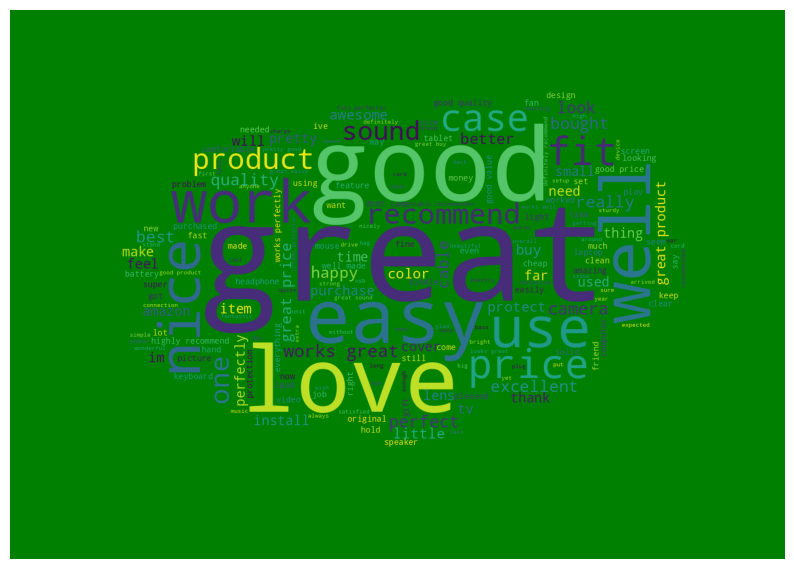

In [42]:
#A wordcloud of positive tweets
wc(positive.reviewText,'green')

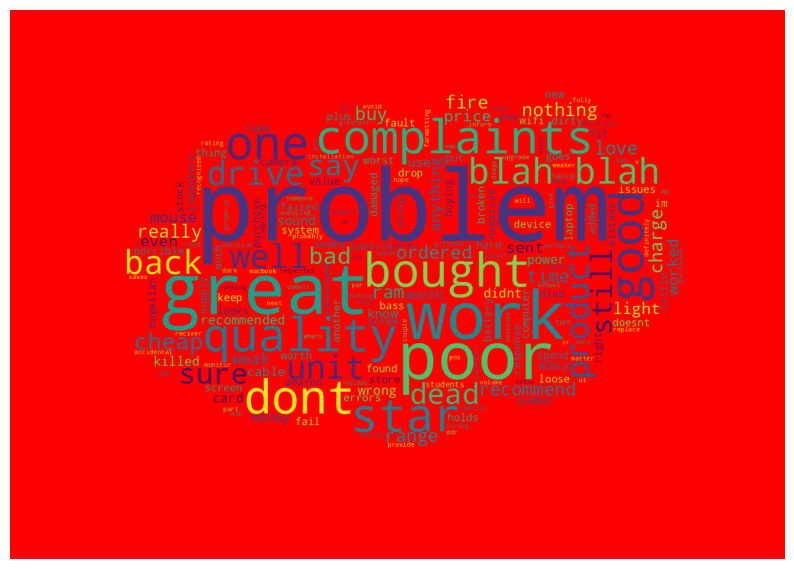

In [43]:
#A wordcloud of negative tweets
wc(negative.reviewText,'red')

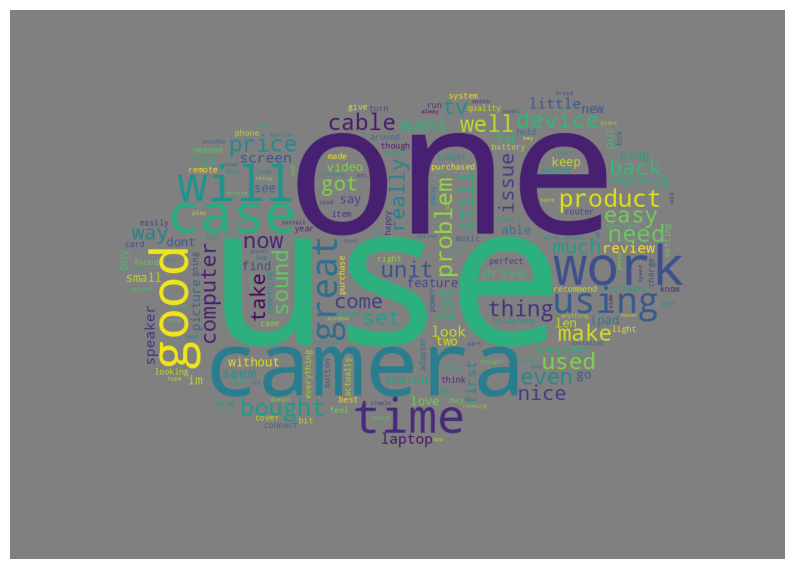

In [44]:
#A wordcloud of neutral tweets
wc(neutral.reviewText,'gray')

# Modelling

### Code Explanation: Custom Lemmatization and Vectorization

The provided code snippet defines a custom lemmatization function and sets up a `CountVectorizer` for text analysis, incorporating specific features for processing text data.

#### **Defining the Lemmatization Function**

`def lemmafn(text):`
    `words = tb(text).words`
    `return [pr.stem(word) for word in words]`

In [45]:
x=df["reviewText"]
y=df["overall"]

In [46]:
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [47]:
def lemmafn(text):
    words=tb(text).words
    return [pr.stem(word) for word in words]

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
vect=CountVectorizer(stop_words="english",ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

In [50]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [69]:
x=vect.fit_transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [52]:
y.isnull().sum()

0

In [53]:
d={1:0,2:1,3:2,4:3,5:4}

In [54]:
y.value_counts()

overall
5    29668
4    10297
3     4242
1     3177
2     2430
Name: count, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [71]:
y_train=y_train.map(d)
y_test=y_test.map(d)

In [57]:
from sklearn.naive_bayes import MultinomialNB

In [58]:
m=MultinomialNB()
model=m.fit(x_train,y_train)
prediction=model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.6114624109204055

In [73]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
accuracy_score(y_test,prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6493024189501154

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model=rf.fit(x_train,y_train)
prediction=model.predict(x_test)
accuracy_score(y_test,prediction)

0.6080497842015458

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
model=knn.fit(x_train,y_train)
prediction=model.predict(x_test)
accuracy_score(y_test,prediction)

0.5633845227341162

In [77]:
from sklearn.svm import SVC
svc=SVC(decision_function_shape='ovr')
model=svc.fit(x_train,y_train)
prediction=model.predict(x_test)
accuracy_score(y_test,prediction)

0.630934457492723

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
model=dt.fit(x_train,y_train)
prediction=model.predict(x_test)
accuracy_score(y_test,prediction)

0.5163103482886681

In [82]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 2.3 MB/s eta 0:00:00


In [83]:
from xgboost import XGBClassifier
xgb= XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model=xgb.fit(x_train,y_train)
prediction=model.predict(x_test)
accuracy_score(y_test,prediction)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:40:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.6506072468132089

## Conclusion

In this project, we successfully applied various Natural Language Processing (NLP) techniques to analyze and classify reviews of electronic products from Amazon. Our workflow encompassed multiple stages, including data preprocessing, language filtering, sentiment analysis, entity recognition, and model training, leading to a comprehensive understanding of the review data.

### Key Achievements

1. **Data Preprocessing**: We meticulously cleaned the dataset by converting text to lowercase, removing punctuation and HTML tags, and filtering out non-English comments. This ensured the data was suitable for effective analysis.
   
2. **Sentiment Analysis**: Through the creation of word clouds, we visually captured the predominant terms in positive and negative reviews, which provided immediate insights into customer sentiments and recurring themes.

3. **Named Entity Recognition (NER)**: By extracting entities such as people, organizations, locations, and products from the reviews, we gained deeper insights into the specific subjects and contexts discussed, enriching our analysis with structured information.

4. **Predictive Modeling**: We explored several classification algorithms to predict the ratings of new reviews. Among the models tested, **XGBoost** emerged as the best-performing model, demonstrating superior accuracy and robustness. Its ability to handle the complexity of textual data and efficiently capture patterns contributed to its excellent performance.

### Final Thoughts

The deployment of XGBoost for rating prediction not only showcased its powerful capabilities in handling diverse and intricate text features but also validated its application in practical NLP scenarios. By leveraging this advanced machine learning model, we achieved a high level of predictive accuracy, enabling the reliable estimation of review ratings based on textual content.

This project underscores the value of integrating NLP with machine learning to analyze and interpret large volumes of unstructured text data. The insights derived can drive data-driven decision-making and enhance user experience by addressing the sentiments and needs of customers more effectively. Future work could explore extending the analysis to multilingual reviews or incorporating additional context-aware features to further refine the predictive capabilities.

In summary, this comprehensive approach to analyzing Amazon reviews has demonstrated the critical role of sophisticated text processing and modeling techniques in unlocking valuable insights from complex datasets.